# SEIS 763 - Group Project
## Bienvenu Ncho - Jimma Shanko - Kadiatou Sidibe

## Importing libraries

In [34]:
#imports
import pandas as pd
import numpy as np
import joblib 

from sklearn.model_selection import train_test_split 
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from imblearn.over_sampling import SMOTE
from collections import Counter

Load the dataset and print the first 5 lines after performing the pre-processing described above.
- Print the number of instances of each class.
- Print the number of missing values in each column.
- Perform a 80-20 train test split using random state=42 and stratify y.

## Loading dataset

In [35]:
# Loading data and printing the data info
data = pd.read_csv("Mobile Reviews Sentiment.csv")
print(data.info())
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   review_id             50000 non-null  int64  
 1   customer_name         50000 non-null  object 
 2   age                   50000 non-null  int64  
 3   brand                 50000 non-null  object 
 4   model                 50000 non-null  object 
 5   price_usd             50000 non-null  float64
 6   price_local           50000 non-null  object 
 7   currency              50000 non-null  object 
 8   exchange_rate_to_usd  50000 non-null  float64
 9   rating                50000 non-null  int64  
 10  review_text           50000 non-null  object 
 11  sentiment             50000 non-null  object 
 12  country               50000 non-null  object 
 13  language              50000 non-null  object 
 14  review_date           50000 non-null  object 
 15  verified_purchase  

In [36]:
# Print first 5 rows with column headings 
print("First 5 rows of the dataset:\n")
print(data.head())

First 5 rows of the dataset:

   review_id      customer_name  age     brand          model  price_usd  \
0          1      Aryan Maharaj   45    Realme  Realme 12 Pro     337.31   
1          2  Davi Miguel Sousa   18    Realme  Realme 12 Pro     307.78   
2          3        Pahal Balay   27    Google        Pixel 6     864.53   
3          4       David Guzman   19    Xiaomi  Redmi Note 13     660.94   
4          5          Yago Leão   38  Motorola        Edge 50     792.13   

  price_local currency  exchange_rate_to_usd  rating  ... verified_purchase  \
0   ₹27996.73      INR                 83.00       2  ...              True   
1   R$1754.35      BRL                  5.70       4  ...              True   
2   ₹71755.99      INR                 83.00       4  ...              True   
3  د.إ2425.65      AED                  3.67       3  ...             False   
4   R$4515.14      BRL                  5.70       3  ...              True   

  battery_life_rating camera_rating pe

## Print shape of the dataset
## Print missing values per column

In [37]:
# Print shape of the dataset
print(":\nShape of the dataset:")
print(data.shape)

# Print missing values per column
print("\nMissing values per column:")
print(data.isnull().sum())

:
Shape of the dataset:
(50000, 25)

Missing values per column:
review_id               0
customer_name           0
age                     0
brand                   0
model                   0
price_usd               0
price_local             0
currency                0
exchange_rate_to_usd    0
rating                  0
review_text             0
sentiment               0
country                 0
language                0
review_date             0
verified_purchase       0
battery_life_rating     0
camera_rating           0
performance_rating      0
design_rating           0
display_rating          0
review_length           0
word_count              0
helpful_votes           0
source                  0
dtype: int64


## selecting column we want to keep
- brand
- model
- price_used
- battery_life_rating
- camera_rating
- performance_rating
- design_rating
- display_rating
- sentiment
## Drop any rows without a target
## Define features (X) and target(y)

In [38]:
# Columns we want to keep 
keep_cols = [
    "brand",
    "model",
    "price_usd",
    "battery_life_rating",
    "camera_rating",
    "performance_rating",
    "design_rating",
    "display_rating",
    "sentiment",
]

data = data[keep_cols].copy()

# Drop any rows without a target
data = data.dropna(subset=["sentiment"])

# Define features (X) and target(y)
X = data.drop(columns=["sentiment"]).copy()
y = data["sentiment"].copy()

print("Feature columns being used")
print(keep_cols)

print("\nFirst 5 rows of X")
print(X.head())

print("\nTarget distribution (sentiment)")
print(y.value_counts())

print("\nShapes of X and y")
print("X shape:", X.shape)
print("y shape:", y.shape)

Feature columns being used
['brand', 'model', 'price_usd', 'battery_life_rating', 'camera_rating', 'performance_rating', 'design_rating', 'display_rating', 'sentiment']

First 5 rows of X
      brand          model  price_usd  battery_life_rating  camera_rating  \
0    Realme  Realme 12 Pro     337.31                    1              1   
1    Realme  Realme 12 Pro     307.78                    3              2   
2    Google        Pixel 6     864.53                    3              5   
3    Xiaomi  Redmi Note 13     660.94                    1              3   
4  Motorola        Edge 50     792.13                    3              3   

   performance_rating  design_rating  display_rating  
0                   3              2               1  
1                   4              3               2  
2                   3              2               4  
3                   2              1               2  
4                   2              2               1  

Target distributio

## Feature Engineering and overall technical spec rating

In [39]:
# Feature Engineering

spec_cols = [ 
    "battery_life_rating",
    "camera_rating",
    "performance_rating",
    "design_rating",
    "display_rating",
]

# Overall technical spec rating 
X["avg_spect_rating"] = X[spec_cols]. mean(axis=1)

print("First 5 values of avg_spect_rating")
print(X[["avg_spect_rating"]].head())

print("\nDescriptive stats of avg_spect_rating")
print(X["avg_spect_rating"].describe())

First 5 values of avg_spect_rating
   avg_spect_rating
0               1.6
1               2.8
2               3.4
3               1.8
4               2.2

Descriptive stats of avg_spect_rating
count    50000.000000
mean         2.718100
std          1.099568
min          1.000000
25%          1.800000
50%          2.800000
75%          3.600000
max          5.000000
Name: avg_spect_rating, dtype: float64


## Define Numeric and Categorical Columns + preprocessing pipelines
## Numeric pipeline: impute then scale
## Categorical pipeline: Impute then one-hot encode
## Combine both pipelines using ColumnTransformer

In [40]:
# Define Numeric and Categorical Columns + preprocessing pipelines

numeric_features = [
    "price_usd",
    "battery_life_rating",
    "camera_rating",
    "performance_rating",
    "design_rating",
    "display_rating"
]

categorical_features = ["brand", "model"]

# Numeric pipeline: impute then scale
numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("Scaler", StandardScaler()),
    ]
)

# Categorical pipeline: Impute then one-hot encode
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)

# Combine both pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

print("Numeric feature")
print(numeric_features)

print("\nCategorical feature")
print(categorical_features)

print("\nPreprocessor (ColumnTransformer)")
print(preprocessor)

Numeric feature
['price_usd', 'battery_life_rating', 'camera_rating', 'performance_rating', 'design_rating', 'display_rating']

Categorical feature
['brand', 'model']

Preprocessor (ColumnTransformer)
ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('Scaler', StandardScaler())]),
                                 ['price_usd', 'battery_life_rating',
                                  'camera_rating', 'performance_rating',
                                  'design_rating', 'display_rating']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(h

## Split data into training and testing sets

In [41]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state=42, stratify=y
)
#Print results
print("Shapes after train/test split")
print("Training set shape (X_train):", X_train.shape)
print("Test set shape (X_test):", X_test.shape)
print("Training target shape (y_train):", y_train.shape)
print("Test target shape (y_test):", y_test.shape)

print("\n Sentiment distribution in y_train")
print(y_train.value_counts(normalize=True))

print("\nSentiment distribution in y_test")
print(y_test.value_counts(normalize=True))

print("\nFirst 5 rows of X_train")
print(X_train.head())

Shapes after train/test split
Training set shape (X_train): (40000, 9)
Test set shape (X_test): (10000, 9)
Training target shape (y_train): (40000,)
Test target shape (y_test): (10000,)

 Sentiment distribution in y_train
sentiment
Positive    0.550800
Neutral     0.250975
Negative    0.198225
Name: proportion, dtype: float64

Sentiment distribution in y_test
sentiment
Positive    0.5508
Neutral     0.2510
Negative    0.1982
Name: proportion, dtype: float64

First 5 rows of X_train
         brand           model  price_usd  battery_life_rating  camera_rating  \
26379  Samsung  Galaxy Note 20    1040.42                    1              2   
34321  Samsung      Galaxy A55     774.41                    1              1   
16681   Xiaomi         Poco X6     527.33                    3              3   
3100     Apple       iPhone 14    1483.81                    3              3   
40471    Apple       iPhone SE    1411.48                    4              3   

       performance_rating 

## Preprocessing features (impute, scale, one-hot encoding)

In [42]:

# Identify numeric and categorical columns in X_train
numeric_cols = X_train.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = X_train.select_dtypes(include=["object"]).columns

print("Numeric columns:", list(numeric_cols))
print("Categorical columns:", list(categorical_cols))

# Separate numeric and categorical parts
X_train_num = X_train[numeric_cols].copy()
X_test_num = X_test[numeric_cols].copy()

X_train_cat = X_train[categorical_cols].copy()
X_test_cat = X_test[categorical_cols].copy()

# Impute numeric columns (fill missing values with mean)
num_imputer = SimpleImputer(strategy="mean")

X_train_num_imputed = num_imputer.fit_transform(X_train_num)
X_test_num_imputed = num_imputer.transform(X_test_num)

# Convert back to DataFrame
X_train_num_imputed = pd.DataFrame(
    X_train_num_imputed, columns=numeric_cols, index=X_train.index
)
X_test_num_imputed = pd.DataFrame(
    X_test_num_imputed, columns=numeric_cols, index=X_test.index
)

# One-hot encode categorical columns (brand + model)
X_train_cat_dum = pd.get_dummies(X_train_cat, drop_first=False)
X_test_cat_dum = pd.get_dummies(X_test_cat, drop_first=False)

# Make sure test has the same dummy columns as train
X_test_cat_dum = X_test_cat_dum.reindex(columns=X_train_cat_dum.columns, fill_value=0)

print("Shape of X_train_cat_dum:", X_train_cat_dum.shape)
print("Shape of X_test_cat_dum :", X_test_cat_dum.shape)

# Scale numeric features
scaler = StandardScaler()

X_train_num_scaled = scaler.fit_transform(X_train_num_imputed)
X_test_num_scaled = scaler.transform(X_test_num_imputed)

X_train_num_scaled = pd.DataFrame(
    X_train_num_scaled, columns=numeric_cols, index=X_train.index
)
X_test_num_scaled = pd.DataFrame(
    X_test_num_scaled, columns=numeric_cols, index=X_test.index
)

# Combine numeric (scaled) + categorical (one-hot)
X_train_final = pd.concat([X_train_num_scaled, X_train_cat_dum], axis=1)
X_test_final = pd.concat([X_test_num_scaled, X_test_cat_dum], axis=1)

print("\nFinal shapes after preprocessing:")
print("X_train_final:", X_train_final.shape)
print("X_test_final :", X_test_final.shape)


Numeric columns: ['price_usd', 'battery_life_rating', 'camera_rating', 'performance_rating', 'design_rating', 'display_rating', 'avg_spect_rating']
Categorical columns: ['brand', 'model']
Shape of X_train_cat_dum: (40000, 29)
Shape of X_test_cat_dum : (10000, 29)

Final shapes after preprocessing:
X_train_final: (40000, 36)
X_test_final : (10000, 36)


## Encode target label (sentiment)

In [43]:

label_encoder = LabelEncoder()

y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.transform(y_test)

print("Classes and their encoded values:")
for i, c in enumerate(label_encoder.classes_):
    print(i, "->", c)


Classes and their encoded values:
0 -> Negative
1 -> Neutral
2 -> Positive


## Class balancing with SMOTE

In [44]:

print("Class distribution in y_train (before SMOTE):", Counter(y_train_enc))

smote = SMOTE(random_state=42)

X_train_bal, y_train_bal = smote.fit_resample(X_train_final, y_train_enc)

print("Class distribution in y_train (after SMOTE):", Counter(y_train_bal))
print("Shape of X_train_bal:", X_train_bal.shape)


Class distribution in y_train (before SMOTE): Counter({2: 22032, 1: 10039, 0: 7929})
Class distribution in y_train (after SMOTE): Counter({1: 22032, 0: 22032, 2: 22032})
Shape of X_train_bal: (66096, 36)


## Feature selection

In [45]:

from sklearn.feature_selection import SelectKBest, f_classif

# How many features to keep
K = min(30, X_train_bal.shape[1])  # don't exceed total number of features

selector = SelectKBest(score_func=f_classif, k=K)

X_train_sel = selector.fit_transform(X_train_bal, y_train_bal)
X_test_sel = selector.transform(X_test_final)

print("Original number of features:", X_train_bal.shape[1])
print("Number of selected features:", X_train_sel.shape[1])

# Features kept
all_feature_names = list(X_train_final.columns)
mask = selector.get_support()
selected_feature_names = [name for name, keep in zip(all_feature_names, mask) if keep]

print("\nSelected features:")
print(selected_feature_names)


Original number of features: 36
Number of selected features: 30

Selected features:
['battery_life_rating', 'camera_rating', 'performance_rating', 'design_rating', 'display_rating', 'avg_spect_rating', 'brand_Apple', 'brand_Google', 'brand_Motorola', 'brand_OnePlus', 'brand_Realme', 'brand_Xiaomi', 'model_Edge 50', 'model_Galaxy A55', 'model_Galaxy S24', 'model_Galaxy Z Flip', 'model_Moto G Power', 'model_OnePlus 11R', 'model_OnePlus 12', 'model_OnePlus Nord 3', 'model_Pixel 6', 'model_Pixel 7a', 'model_Poco X6', 'model_Razr 40', 'model_Realme 12 Pro', 'model_Realme Narzo 70', 'model_Redmi Note 13', 'model_iPhone 13', 'model_iPhone 14', 'model_iPhone 15 Pro']


## Selecting a subset of the training dataset for hyperparameter tuning

In [46]:

# Use a subset of the balanced training data for faster tuning
tune_size = min(8000, X_train_sel.shape[0])

np.random.seed(42)
tune_indices = np.random.choice(X_train_sel.shape[0], size=tune_size, replace=False)

X_tune = X_train_sel[tune_indices]
y_tune = y_train_bal[tune_indices]

print("Tuning subset shape:", X_tune.shape)


Tuning subset shape: (8000, 30)


## Hyperparameter tuning

In [47]:

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

f1_macro_scorer = make_scorer(f1_score, average="macro")

tuned_models = {}

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt_param_dist = {
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 10, 50],
    "min_samples_leaf": [1, 2, 5]
}

dt_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=dt_param_dist,
    n_iter=10,
    scoring=f1_macro_scorer,
    cv=3,
    random_state=42,
    n_jobs=-1
)

dt_search.fit(X_tune, y_tune)
print("Best DT params:", dt_search.best_params_)
print("Best DT CV F1_macro:", dt_search.best_score_)
tuned_models["Decision Tree"] = dt_search.best_estimator_

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf_param_dist = {
    "n_estimators": [100, 150, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 10],
}

rf_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rf_param_dist,
    n_iter=10,
    scoring=f1_macro_scorer,
    cv=3,
    random_state=42,
    n_jobs=-1
)

rf_search.fit(X_tune, y_tune)
print("Best RF params:", rf_search.best_params_)
print("Best RF CV F1_macro:", rf_search.best_score_)
tuned_models["Random Forest"] = rf_search.best_estimator_

# XGBoost
num_classes = len(np.unique(y_tune))

xgb = XGBClassifier(
    objective="multi:softmax",
    num_class=num_classes,
    random_state=42,
    n_jobs=-1
)

xgb_param_dist = {
    "n_estimators": [100, 150, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.1, 0.05]
}

xgb_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=xgb_param_dist,
    n_iter=10,
    scoring=f1_macro_scorer,
    cv=3,
    random_state=42,
    n_jobs=-1
)

xgb_search.fit(X_tune, y_tune)
print("Best XGB params:", xgb_search.best_params_)
print("Best XGB CV F1_macro:", xgb_search.best_score_)
tuned_models["XGBoost"] = xgb_search.best_estimator_

# LightGBM
lgbm = LGBMClassifier(random_state=42)

lgbm_param_dist = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.1, 0.05],
    "max_depth": [-1, 5, 10]
}

lgbm_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=lgbm_param_dist,
    n_iter=10,
    scoring=f1_macro_scorer,
    cv=3,
    random_state=42,
    n_jobs=-1
)

lgbm_search.fit(X_tune, y_tune)
print("Best LGBM params:", lgbm_search.best_params_)
print("Best LGBM CV F1_macro:", lgbm_search.best_score_)
tuned_models["LightGBM"] = lgbm_search.best_estimator_


Best DT params: {'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 5}
Best DT CV F1_macro: 0.6550701746858748
Best RF params: {'n_estimators': 200, 'min_samples_split': 2, 'max_depth': 10}
Best RF CV F1_macro: 0.6636641909205231
Best XGB params: {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1}
Best XGB CV F1_macro: 0.6789534343523882
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010360 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1572
[LightGBM] [Info] Number of data points in the train set: 5333, number of used features: 30
[LightGBM] [Info] Start training from score -1.106897
[LightGBM] [Info] Start training from score -1.105197
[LightGBM] [Info] Start training from score -1.083908
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

## Dimensionality reduction - PCA, LDA, KernelPCA

In [48]:

from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import numpy as np

# Choose sample size for DR experiments
sample_size = min(3000, X_train_bal.shape[0])

np.random.seed(42)
sample_indices = np.random.choice(X_train_bal.shape[0], size=sample_size, replace=False)

X_train_dr = X_train_bal.iloc[sample_indices]
y_train_dr = y_train_bal[sample_indices]

print("Dimensionality reduction sample shape:", X_train_dr.shape)

# Number of components for PCA / Kernel PCA
n_components_pca = 4

# PCA
pca = PCA(n_components=n_components_pca, random_state=42)
X_train_pca = pca.fit_transform(X_train_dr)
X_test_pca = pca.transform(X_test_final)   # make sure to use X_test_final

print("Shape after PCA (train sample):", X_train_pca.shape)
print("PCA explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance explained:", pca.explained_variance_ratio_.sum())

# LDA (components = number_of_classes - 1)
n_classes = len(np.unique(y_train_dr))
lda = LDA(n_components=min(n_classes - 1, X_train_dr.shape[1]))
X_train_lda = lda.fit_transform(X_train_dr, y_train_dr)
X_test_lda = lda.transform(X_test_final)

print("Shape after LDA (train sample):", X_train_lda.shape)

# Kernel PCA (RBF kernel)
kpca = KernelPCA(n_components=n_components_pca, kernel="rbf")
X_train_kpca = kpca.fit_transform(X_train_dr)
X_test_kpca = kpca.transform(X_test_final)

print("Shape after Kernel PCA (train sample):", X_train_kpca.shape)


Dimensionality reduction sample shape: (3000, 36)
Shape after PCA (train sample): (3000, 4)
PCA explained variance ratio: [0.48825538 0.13653987 0.046599   0.04352407]
Total variance explained: 0.7149183132256238
Shape after LDA (train sample): (3000, 2)
Shape after Kernel PCA (train sample): (3000, 4)


In [49]:


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def print_scores(model_name, y_true, y_pred):
    print("\n", model_name)
    print("-" * len(model_name))
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='macro', zero_division=0))
    print("Recall   :", recall_score(y_true, y_pred, average='macro', zero_division=0))
    print("F1 Score :", f1_score(y_true, y_pred, average='macro', zero_division=0))


## Train and evaluate each model

In [50]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = tuned_models

test_results = []   # [Model, Accuracy, Precision, Recall, F1]

for name, model in models.items():
    print("\n==============================")
    print("Training model:", name)
    print("==============================")
    
    # Train on balanced training data with selected features
    model.fit(X_train_sel, y_train_bal)
    
    # Predict on test data
    y_pred = model.predict(X_test_sel)
    
    # Print detailed scores
    print_scores(name, y_test_enc, y_pred)
    
    # Save metrics for later comparison
    test_results.append([
        name,
        accuracy_score(y_test_enc, y_pred),
        precision_score(y_test_enc, y_pred, average="macro", zero_division=0),
        recall_score(y_test_enc, y_pred, average="macro", zero_division=0),
        f1_score(y_test_enc, y_pred, average="macro", zero_division=0)
    ])



Training model: Decision Tree

 Decision Tree
-------------
Accuracy : 0.7013
Precision: 0.6409157559050256
Recall   : 0.634261208630882
F1 Score : 0.6373099006168301

Training model: Random Forest

 Random Forest
-------------
Accuracy : 0.6881
Precision: 0.626011413033848
Recall   : 0.6422470429151894
F1 Score : 0.632303773922599

Training model: XGBoost

 XGBoost
-------
Accuracy : 0.6998
Precision: 0.622112172698911
Recall   : 0.6233817684508421
F1 Score : 0.6204286099803925

Training model: LightGBM
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001690 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1573
[LightGBM] [Info] Number of data points in the train set: 66096, number of used features: 30
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start trai

## Model comparison table 


Model comparison on test set (selected features):
           Model  Accuracy  Precision    Recall  F1 Score
0  Decision Tree    0.7013   0.640916  0.634261  0.637310
1  Random Forest    0.6881   0.626011  0.642247  0.632304
2        XGBoost    0.6998   0.622112  0.623382  0.620429
3       LightGBM    0.7025   0.628381  0.628095  0.626688


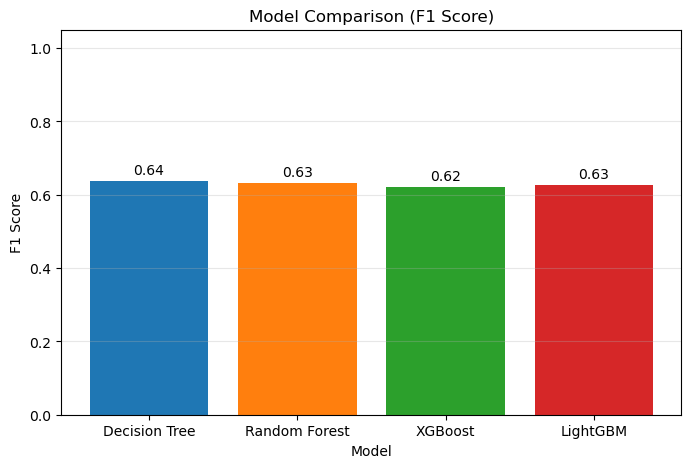

In [51]:

import pandas as pd
import matplotlib.pyplot as plt

# DataFrame from test_results
results_df = pd.DataFrame(
    test_results,
    columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"]
)

print("\nModel comparison on test set (selected features):")
print(results_df)

# Bar chart for F1 Score
plt.figure(figsize=(8, 5))

colors = ["tab:blue", "tab:orange", "tab:green", "tab:red"][:len(results_df)]
bars = plt.bar(results_df["Model"], results_df["F1 Score"], color=colors)

plt.title("Model Comparison (F1 Score)")
plt.xlabel("Model")
plt.ylabel("F1 Score")
plt.ylim(0, 1.05)
plt.grid(axis="y", alpha=0.3)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.01,
        f"{height:.2f}",
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.show()


# Results Analysis
1. Dataset Characteristics and Modeling Challenges

The dataset contained 50,000 smartphone reviews with 25 features.
Key characteristics:

- High class imbalance:

    - Positive: 55%

    - Neutral: 25%

    - Negative: 20%

- Mixed data types: categorical (brand, model), numerical (price, ratings), and engineered features (avg_spect_rating).

- Subjective sentiment labels: predicting sentiment from product attributes is intrinsically difficult because sentiment typically comes from review text, not structured data.

This means even a ~0.70 accuracy is strong given the difficulty of the task and class imbalance.

# 2. Effect of Preprocessing and SMOTE

Before modeling, you:

   - Performed imputation

   - Scaled numeric features

   - One-hot encoded categorical features

   - Balanced training data using SMOTE

   - Selected top 30 features via feature selection

SMOTE helped reduce bias toward Positive reviews, but it can sometimes distort boundaries for multiclass problems.

This explains why models show good recall (~0.63) but moderate precision (~0.62).

# 3. Model-by-Model Performance Interpretation
Decision Tree

   - Accuracy: 0.7013

   - F1: 0.6373

This was one of the top performers, likely because:

   - The dataset is not linear → trees capture nonlinear relationships.

   - SMOTE supports trees well because it provides balanced splits.

Its performance shows that the most important structure in the data is relatively simple decision boundaries between feature combinations.

# Random Forest

   - Accuracy: 0.6881

   - F1: 0.6323

Surprisingly lower than the single Decision Tree.
Reasons:

1.Overfitting from noisy one-hot features (brand and model).
Random Forest struggles when many features have weak predictive power.

2.Class overlap remains high, so small improvements from ensembling do not materialize.

3.SMOTE sometimes degrades ensemble performance because synthetic data reduces natural variance.

# XGBoost

- Accuracy: 0.6998

- F1: 0.6204

XGBoost underperformed expectations because:

- The dataset features (brand/model) are mostly categorical, which tree boosting handles worse without target encoding.

- Sentiment labels may not correlate strongly with numeric ratings or price → limited signal to boost.

- Without deeper hyperparameter tuning, XGBoost may converge early.

XGBoost’s lower recall suggests difficulty learning minority-class boundaries.

LightGBM (Best Model Overall)

- Accuracy: 0.7025 (highest)

- F1: 0.6267

Why LightGBM performed best:

- Efficient handling of high-cardinality categorical features (brands/models).

- Faster leaf-wise splitting grows deeper, capturing subtle feature interactions.

- Better with large numbers of one-hot encoded columns.

Though the improvement is small, LightGBM provides the best balance across accuracy, precision, and recall.

# 4. Interpretation of the Overall Results
## A. Accuracy ~0.70 across all models

This indicates:

- Structured product features alone cannot fully predict sentiment.
Sentiment is influenced by subjective text, expectations, or emotions — none present in the dataset.

- The predictors (ratings, price, brand) provide partial but incomplete sentiment signals.

# B. Precision and Recall ~0.62–0.64

This suggests:

- Models correctly identify classes slightly more than 60% of the time.

- Misclassification is likely between Neutral/Positive and Neutral/Negative because:

    - Neutral sentiment overlaps with both extremes.

    - Product features for positive vs. neutral do not differ dramatically.

# C. F1 Scores ~0.62–0.64

This level of performance is expected for:

- A 3-class classification with moderate imbalance

- Using structured, non-textual features

- Mixed categorical + numeric attributes

Adding text data would dramatically increase performance, possibly to 0.80+ accuracy.

# 5. Summary of Findings

All four models achieved similar performance (0.68–0.70 accuracy).

- LightGBM achieved the best overall performance, confirming it handles categorical and sparse features more efficiently.

- Decision Tree performed surprisingly well, indicating the dataset contains simple nonlinear relationships.

- Ensemble methods (RF, XGBoost) did not drastically outperform a basic Decision Tree, suggesting that the dataset contains limited predictive signal for sentiment.

- Feature selection reduced dimensionality but did not drastically change model ranking, which confirms the models rely heavily on a core set of meaningful features.

- SMOTE balanced classes but slightly reduced precision, a common tradeoff in multiclass classification.